In [5]:
import numpy as np

In [69]:


def angle_difference_peak180(saccades1, saccades2, power=1, matching=False):
    """
    Calculates differences between 0 and 180 degrees, with a peak of 1 at 180 degrees.
    Normalizes to the range 0–1, with a decrease back to 0 after 180 degrees.
    Allows for custom exponentials via the `power` parameter.
    
    If `matching` is True, calculates the difference between the two saccade arrays
    based on the array order, penalizing extra saccades.
    
    Parameters:
        saccades1: np.ndarray
            A 1D array of saccade angles in degrees.
        saccades2: np.ndarray
            A 1D array of saccade angles in degrees.
        power: int or float
            The exponent applied to the similarity values. Defaults to 1.
        matching: bool
            If True, matches saccades based on minimum differences, penalizing extras.
    
    Returns:
        float: The mean similarity score, normalized between 0 and 1.
    """
    if matching:
        # Calculate differences between saccades with a matching penalty for extras
        matched_diffs = []
        saccades2_used = np.zeros(len(saccades2), dtype=bool)

        for angle1 in saccades1:
            diffs = np.abs(angle1 - saccades2) % 360
            diffs = np.minimum(diffs, 360 - diffs)  # Handle circularity
            # Find the closest match in saccades2
            min_diff_idx = np.argmin(diffs)
            if not saccades2_used[min_diff_idx]:
                saccades2_used[min_diff_idx] = True
                matched_diffs.append(diffs[min_diff_idx])
            else:
                matched_diffs.append(180)  # Penalize unmatched saccades
        
        # Penalize remaining unmatched saccades in saccades2
        unmatched_penalty = [180] * (len(saccades2) - np.sum(saccades2_used))
        matched_diffs.extend(unmatched_penalty)

        normalized_diffs = np.array(matched_diffs) / 180
        symmetric_diffs = 1 - np.abs(1 - normalized_diffs)
        similarity_score = np.mean(symmetric_diffs**power)
    else:
        diffs = np.abs(saccades1[:, np.newaxis] - saccades2) % 360
        diffs = np.minimum(diffs, 360 - diffs) 
        normalized_diffs = (np.abs(diffs) / 180) 
        symmetric_diffs = 1 - np.abs(1 - normalized_diffs) 
        similarity_score = np.mean(symmetric_diffs**power)
    
    return similarity_score
    
s1 = [5,45,357,2,359]
s2 = [360,2]
s3 = [350]
print(angle_difference_peak180(np.array(s1),np.array(s2),1,False))
s1 = [5,45,357,2,359]
s2 = [360,2]
s3 = [350]
print(angle_difference_peak180(np.array(s2),np.array(s3),1,False))

print('---')

s1 = [5,45,357,2,359]
s2 = [360,2]
s3 = [350]
print(angle_difference_peak180(np.array(s1),np.array(s2),1,True))
s1 = [5,45,357,2,359]
s2 = [360,2]
s3 = [350]
print(angle_difference_peak180(np.array(s2),np.array(s3),1,True))


0.06111111111111113
0.061111111111111116
---
0.6066666666666667
0.5277777777777778


In [72]:
s1 = [360,2,180,358]
s2 = [2,360,5,358]
s3 = [360]
print(angle_difference_peak180(np.array(s1),np.array(s3),1,True))
s1 = [360,2,180,358]
s2 = [2,360,5,358]
s3 = [360]
print(angle_difference_peak180(np.array(s2),np.array(s3),1,True))
s1 = [360,2,180,358]
s2 = [2,360,5]
s3 = [360]
print(angle_difference_peak180(np.array(s1),np.array(s2),1,True))

0.75
0.7527777777777778
0.4930555555555556


---

In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PyEyeSim import EyeData

In [74]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_fixations.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))

(48675, 19)


dataset size:  (48675, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  231.79  +/-  6

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

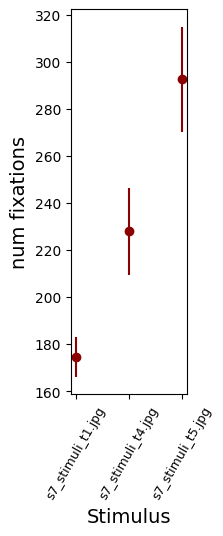

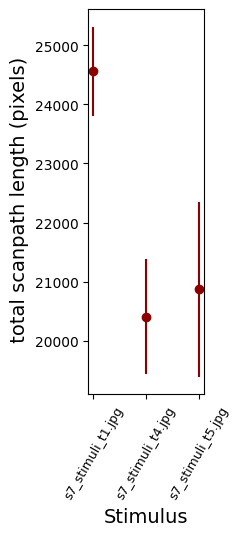

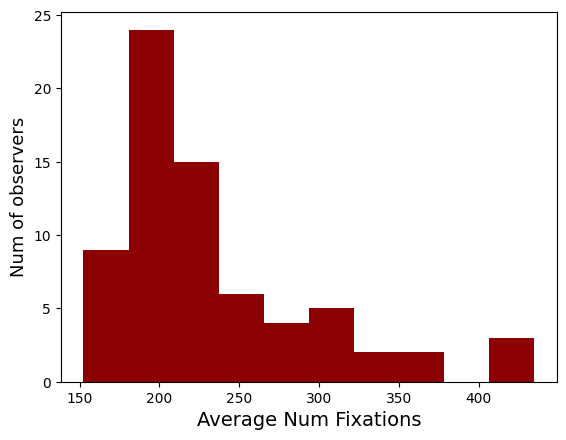

In [75]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='orig_fix_x',mean_y='orig_fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid', StimPath=Path+'images/',StimExt='.jpg')
DyslexiaDat.RunDescriptiveFix(Visual=1)